In [1]:
import praw

reddit = praw.Reddit(client_id='Pj5o8QpNXXJY9A',
                    client_secret='pQKMRBmhp0In48NoNvvktfRo2eA',
                    pasword = 'prawisgreat',
                    user_agent='Reddit Unlocked CS196 Project @ UIUC',
                    username='RedditUnlocked196')
news = reddit.subreddit('news')
for submission in news.top('year'):
    print(submission.url)

http://wtkr.com/2017/07/20/tmz-report-chester-bennington-of-linkin-park-commits-suicide/
http://www.reuters.com/article/us-usa-trump-immigration-idUSKBN15E1DE
http://abcn.ws/2qPcnnU
http://www.prnewswire.com/news-releases/american-icon-and-playboy-founder-hugh-m-hefner-has-died-300527267.html
https://lbpost.com/life/pets/2000011459-pet-store-bill-passes-california-senate-38-to-0
http://money.cnn.com/2017/02/24/media/cnn-blocked-white-house-gaggle/index.html
https://www.independent.co.uk/news/uk/home-news/billy-caldwell-cannabis-oil-boy-seizures-stopped-cured-prescription-medical-marijuana-a7933066.html
http://www.independent.co.uk/life-style/gadgets-and-tech/news/youtube-daddyofive-cody-videos-watch-children-custody-latest-prank-parents-a7713376.html
http://people.com/movies/carrie-fisher-dies/
http://wapo.st/2pPSCIo
http://abc7chicago.com/news/4-charged-with-hate-crimes-in-torture-of-teen-in-facebook-live-video/1687517/
http://abcnews.go.com/Politics/trump-withdrawing-us-paris-climate

In [7]:
from newspaper import Article
import rake as rake
import operator

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import plotly
plotly.tools.set_credentials_file(username='garyab2', api_key='z5BAYXzRgsyImX2a7HZU')
import plotly.plotly as py
from plotly.graph_objs import *

In [3]:
top10news_df = pd.DataFrame({
    'title': (),
    'url' : (),
    'upvote_percentage': (),
    'year_posted': (),
    'month_posted': (),
    'day_posted': (),
    'is_self': (),
    'is_video': (),
    'media': (),
    'domain': (),
    'upvotes': (),
    'downvotes': (),
    'score': (),
    'views': ()
})
for submission in news.top('year', limit = 10):
    s = pd.Series([submission.title, submission.url, submission.upvote_ratio * 100,
                   datetime.utcfromtimestamp(submission.created_utc).year,
                  datetime.utcfromtimestamp(submission.created_utc).month,
                  datetime.utcfromtimestamp(submission.created_utc).day,
                  submission.is_self, submission.is_video, submission.media, submission.domain,
                   submission.score, submission.view_count, int(submission.score * submission.upvote_ratio)],
                  index=['title','url','upvote_percentage', 'year_posted', 'month_posted',
                         'day_posted', 'is_self', 'is_video', 'media', 'domain', 'score','views', 'upvotes'])
    top10news_df = top10news_df.append(s, ignore_index=True)
top10news_df['downvotes'] = top10news_df['score'] - top10news_df['upvotes']
top10news_df

,day_posted,domain,downvotes,is_self,is_video,media,month_posted,score,title,upvote_percentage,upvotes,url,views,year_posted
0,20.0,wtkr.com,19749.0,0.0,0.0,None,7.0,123431.0,Chester Bennington of Linkin Park commits suicide,84.0,103682.0,http://wtkr.com/2017/07/20/tmz-report-chester-...,None,2017.0
1,31.0,reuters.com,23092.0,0.0,0.0,None,1.0,121533.0,U.S. President Donald Trump fired the federal ...,81.0,98441.0,http://www.reuters.com/article/us-usa-trump-im...,None,2017.0
2,9.0,abcn.ws,13202.0,0.0,0.0,None,5.0,110015.0,James Comey terminated as Director of FBI,88.0,96813.0,http://abcn.ws/2qPcnnU,None,2017.0
3,28.0,prnewswire.com,17292.0,0.0,0.0,None,9.0,108070.0,"American Icon and Playboy Founder, Hugh M. Hef...",84.0,90778.0,http://www.prnewswire.com/news-releases/americ...,None,2017.0
4,13.0,lbpost.com,8543.0,0.0,0.0,None,9.0,106784.0,Pet Store Bill Passes California Senate 38 to ...,92.0,98241.0,https://lbpost.com/life/pets/2000011459-pet-st...,None,2017.0
5,24.0,money.cnn.com,16378.0,0.0,0.0,None,2.0,102360.0,CNN banned from White House press briefing,84.0,85982.0,http://money.cnn.com/2017/02/24/media/cnn-bloc...,None,2017.0
6,7.0,independent.co.uk,17221.0,0.0,0.0,None,9.0,101297.0,Boy who suffered up to 100 seizures a day has ...,83.0,84076.0,https://www.independent.co.uk/news/uk/home-new...,None,2017.0
7,2.0,independent.co.uk,11098.0,0.0,0.0,None,5.0,100889.0,YouTube star Daddyofive loses custody of two c...,89.0,89791.0,http://www.independent.co.uk/life-style/gadget...,None,2017.0
8,27.0,people.com,18864.0,0.0,0.0,None,12.0,99284.0,Carrie Fisher Dies at 60,81.0,80420.0,http://people.com/movies/carrie-fisher-dies/,None,2016.0
9,15.0,wapo.st,28588.0,0.0,0.0,None,5.0,92218.0,Trump revealed highly classified information t...,69.0,63630.0,http://wapo.st/2pPSCIo,None,2017.0


In [86]:
words = {}

for i in range(len(top10news_df)):
    #top10news_df.iloc[i]['url']
    myArticle = Article(top10news_df.iloc[i]['url'])
    myArticle.download()
    myArticle.parse()
    myArticle.nlp()
    for keyword in myArticle.keywords:
        if keyword not in words:
            words[keyword] = [keyword, 1, top10news_df.iloc[i]['upvotes']]
        else:
            words[keyword][1] += 1
            words[keyword][2] += top10news_df.iloc[i]['upvotes']
keywords_df = pd.DataFrame(words, index=['keyword','occurence','upvotes'])
keywords_df = keywords_df.transpose().set_index('keyword')
keywords_df

,occurence,upvotes
keyword,,
100,1,84076
300,1,84076
38,1,98241
41,1,103682
485,1,98241
60,1,80420
album,1,103682
ambassador,1,63630
american,1,90778


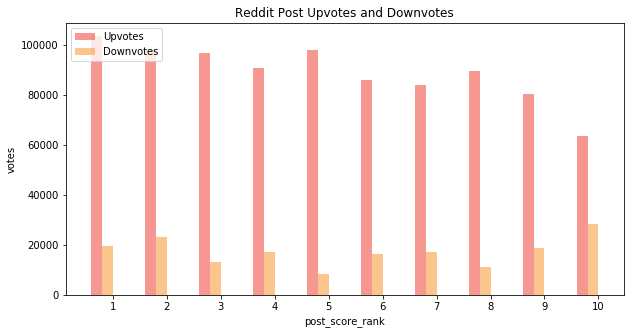

/home/jshah59/miniconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [4]:
#code reference from https://chrisalbon.com/python/matplotlib_grouped_bar_plot.html
pos = list(range(len(top10news_df['title'])))
width = .2

fig, ax = plt.subplots(figsize = (10,5))
plt.bar(pos, 
        #using df['upvotes'] data,
        top10news_df['upvotes'], 
        # of width
        width, 
        # with alpha 0.5
        alpha=0.5, 
        # with color
        color='#EE3224', 
        # with label the first value in title
        label=top10news_df['title'][0]) 
plt.bar([p + width for p in pos],
       top10news_df['downvotes'],
        width,
        alpha = .5,
        color='#F78F1E',
        label=top10news_df['title'][1]
       )
ax.set_ylabel('votes')
ax.set_xlabel('post_score_rank')
ax.set_title('Reddit Post Upvotes and Downvotes')
ax.set_xticks([p + 1.5 * width for p in pos])
ax.set_xticklabels(range(1,11))
plt.legend(['Upvotes', 'Downvotes'], loc='upper left')
plt.show()
py.iplot_mpl(fig)

In [5]:
#plotly interactive barchart testing
#code reference from https://plot.ly/python/ipython-notebook-tutorial/#plotting-interactive-maps
trace_upvotes = Bar(x=top10news_df.title,
                   y=top10news_df.upvotes,
                   name='Upvotes',
                   marker=dict(color='#FFCDD2'))

trace_downvotes = Bar(x=top10news_df.title,
                     y=top10news_df.downvotes,
                     name='Downvotes',
                     marker=dict(color='#A2D5F2'))
data = [trace_upvotes, trace_downvotes]
layout = Layout(title="Reddit Post Upvotes and Downvotes",
               xaxis=dict(title='title'))
fig=Figure(data=data, layout=layout)

py.iplot(fig)